In [3]:
# Homework #2 Part I: <br>Prove that as a function of $\theta$...

from sympy import symbols, exp, simplify, Sum, expand

# Defining the symbols
theta, theta_0, phi, tau = symbols('theta theta_0 phi tau')
n, x = symbols('n x', integer=True)

# LHS expression
LHS = exp(-1/2 * (Sum(phi * (x - theta)**2, (x, 1, n)) + tau * (theta - theta_0)**2))

# Expand and simplify the LHS expression
LHS_expanded = LHS.rewrite(Sum, lambda x: phi * (x**2 - 2*x*theta + theta**2)).doit()
LHS_simplified = simplify(expand(LHS_expanded))

# Collecting and simplifying terms involving theta and theta^2
theta_terms_collected = LHS_simplified.collect(theta)
theta_terms_simplified = simplify(theta_terms_collected)

# Coefficient of theta^2 and the linear term in theta
theta_2_coefficient = tau + n * phi
linear_theta_term = -tau * theta_0 - 0.5 * n * phi

# Complete the square for the expression in terms of theta
completed_square = theta_2_coefficient * (theta - simplify(-linear_theta_term / theta_2_coefficient))**2

# Simplifying the completed square for comparison with the original expression
simplified_completed_square = simplify(expand(completed_square))

simplified_completed_square


1.0*(1.0*n**2*phi**2*theta**2 - 1.0*n**2*phi**2*theta + 0.25*n**2*phi**2 + 2.0*n*phi*tau*theta**2 - 2.0*n*phi*tau*theta*theta_0 - 1.0*n*phi*tau*theta + 1.0*n*phi*tau*theta_0 + 1.0*tau**2*theta**2 - 2.0*tau**2*theta*theta_0 + 1.0*tau**2*theta_0**2)/(n*phi + tau)

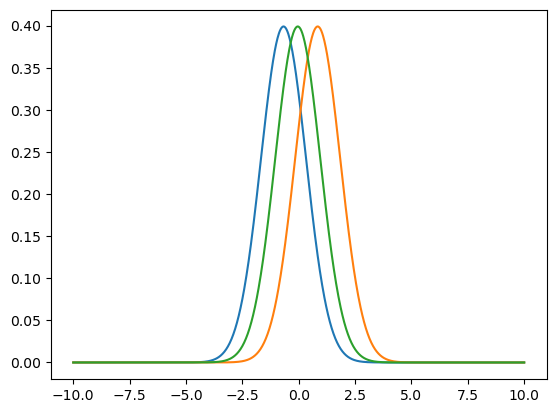

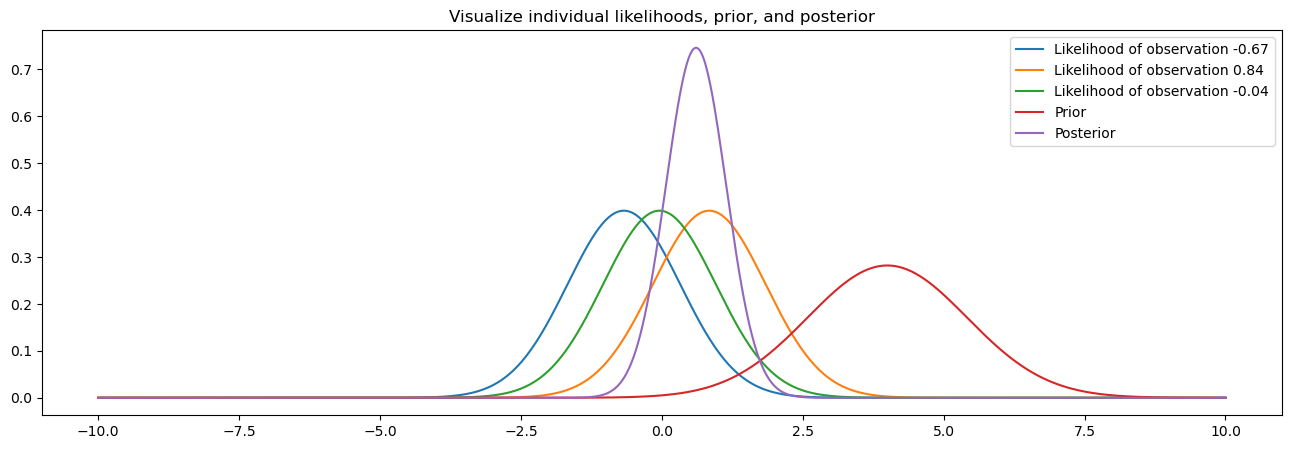

In [5]:
#Part II
#1.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Initial setup
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Prior distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Plotting each individual likelihood
for xi in x:
    individual_likelihood = stats.norm.pdf(xi, loc=parameter_domain, scale=1)
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {xi:.2f}")

# Posterior distribution
posterior = stats.norm(loc=(tau*theta_0 + x.sum())/(tau + n), scale=1/(tau + n)**0.5).pdf(parameter_domain)

# Plotting
plt.figure(figsize=(16, 5))
for xi in x:
    individual_likelihood = stats.norm.pdf(xi, loc=parameter_domain, scale=1)
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {xi:.2f}")
plt.plot(parameter_domain, prior, label="Prior")
plt.plot(parameter_domain, posterior, label="Posterior")

# Joint distribution (not necessary in this context but can be included for completeness)
# joint = prior * np.prod([stats.norm.pdf(xi, loc=parameter_domain, scale=1) for xi in x], axis=0)
# plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar)")

plt.legend()
plt.title("Visualize individual likelihoods, prior, and posterior")
plt.show()


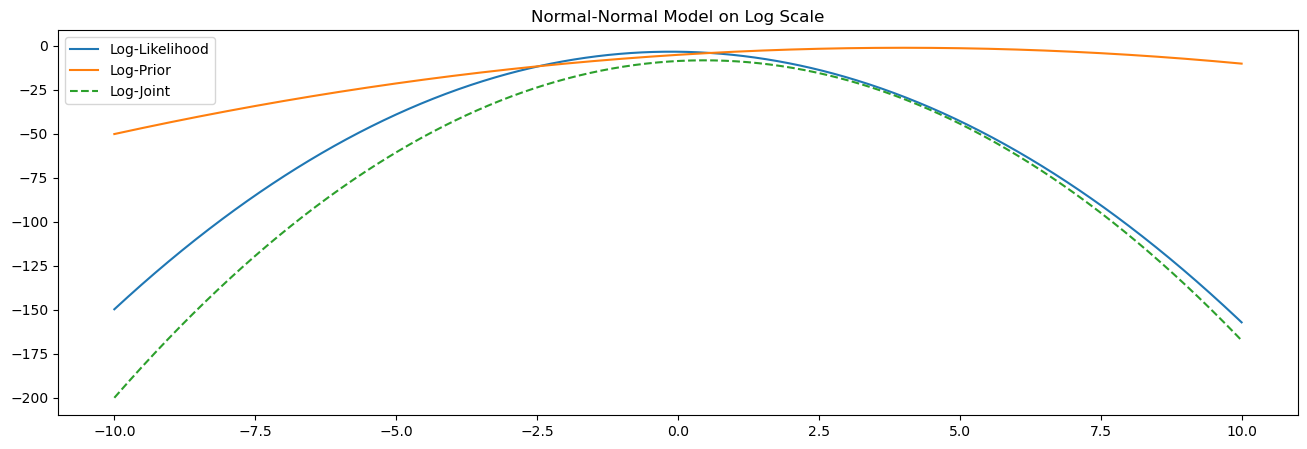

In [6]:
#Part II
#2.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Initial setup
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Log-likelihood for each data point and total log-likelihood
log_likelihood = np.sum([stats.norm.logpdf(xi, loc=parameter_domain, scale=1) for xi in x], axis=0)

# Log of the prior pdf
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)

# Log of the joint distribution
log_joint = log_likelihood + log_prior

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, log_likelihood, label="Log-Likelihood")
plt.plot(parameter_domain, log_prior, label="Log-Prior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="Log-Joint")

# Adding labels and title
plt.legend()
plt.title("Normal-Normal Model on Log Scale")
plt.show()


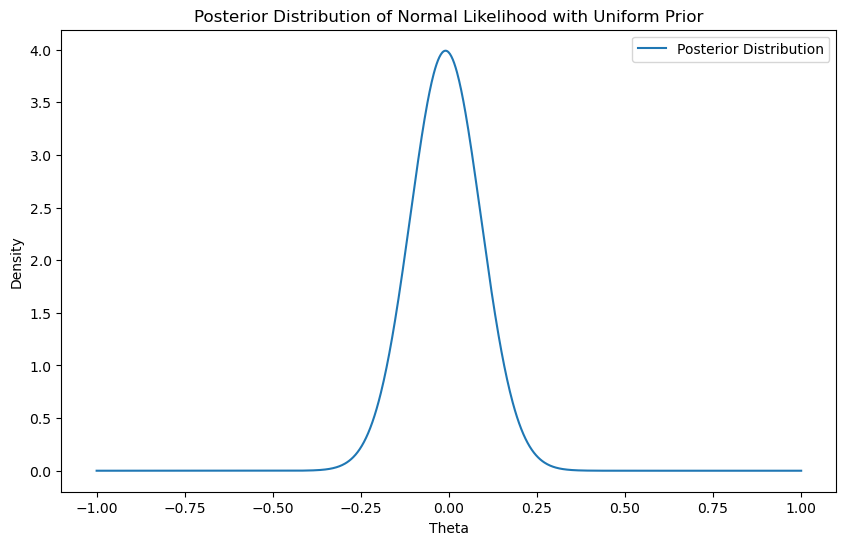

In [8]:
#Part II
#3.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Simulate data from a normal distribution
n = 100  # Number of observations
true_mean = 0  # True mean of the distribution
sigma = 1     # Known standard deviation of the distribution
data = np.random.normal(true_mean, sigma, n)

# Calculate the sample mean
sample_mean = np.mean(data)

# Calculate the variance of the posterior distribution
posterior_variance = sigma**2 / n

# The posterior is a normal distribution with the calculated mean and variance
posterior = stats.norm(loc=sample_mean, scale=np.sqrt(posterior_variance))

# Plotting the posterior distribution
parameter_domain = np.linspace(-1, 1, 1000)
posterior_pdf = posterior.pdf(parameter_domain)

plt.figure(figsize=(10, 6))
plt.plot(parameter_domain, posterior_pdf, label="Posterior Distribution")
plt.title("Posterior Distribution of Normal Likelihood with Uniform Prior")
plt.xlabel("Theta")
plt.ylabel("Density")
plt.legend()
plt.show()


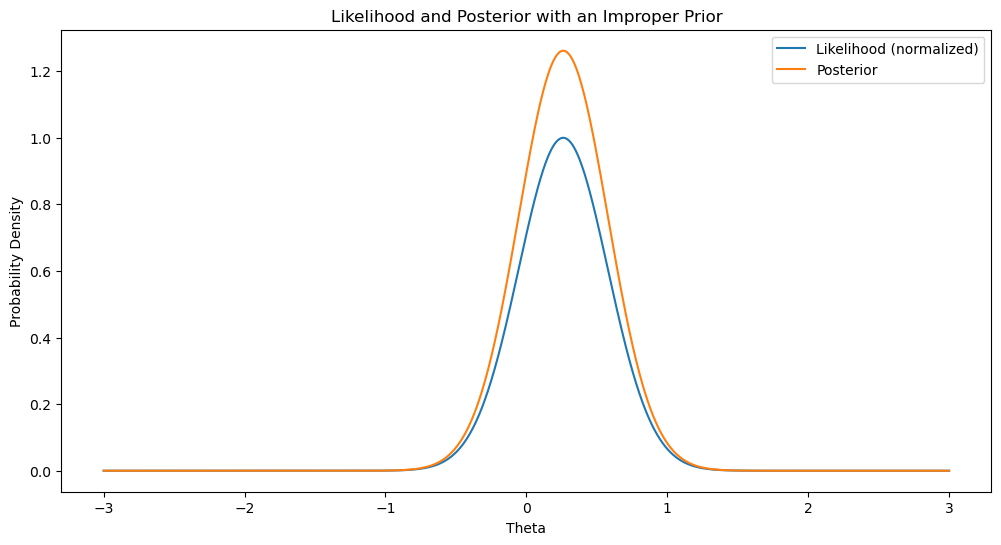

In [13]:
#Part II
#4.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Simulate data from a normal distribution
true_mean = 0
sigma = 1
data = np.random.normal(true_mean, sigma, size=10)

# Define the parameter domain
theta_domain = np.linspace(-3, 3, 1000)

# Compute the likelihood for each theta value
likelihood = np.array([np.prod(stats.norm.pdf(data, loc=theta, scale=sigma)) for theta in theta_domain])

# Compute the log likelihood for each theta value
log_likelihood = np.array([np.sum(stats.norm.logpdf(data, loc=theta, scale=sigma)) for theta in theta_domain])

# For an improper uniform prior, assume it's constant
improper_prior = 1  # Constant value for the uniform prior

# Compute the unnormalized posterior (likelihood * prior)
# Since the prior is constant, it doesn't affect the shape of the posterior
posterior = likelihood * improper_prior

# Compute the log posterior (log likelihood + log prior)
# Adding a constant to log likelihood (since log(1) = 0 for the improper prior)
log_posterior = log_likelihood + np.log(improper_prior)

# Normalizing the posterior to make it a valid probability distribution
posterior /= np.trapz(posterior, theta_domain)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(theta_domain, likelihood / np.max(likelihood), label='Likelihood (normalized)')
plt.plot(theta_domain, posterior, label='Posterior')
plt.title('Likelihood and Posterior with an Improper Prior')
plt.xlabel('Theta')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

